In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


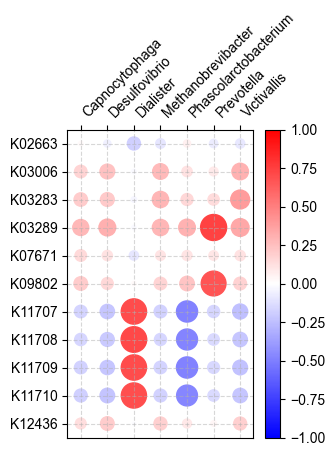

In [ ]:
fig=plt.figure(figsize=(3, 4))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'

df1 = pd.read_csv('corration bimodal & all genus(sort)/3countriescombined_corration_bimodal&genus(genus)',index_col=0,sep='\t')
df2 = pd.read_csv('bimodal genus/3_countries_combined_genus_normalization_BiDgenus',index_col=0,sep='\t')
data0 = df1[df2.index]
data = data0.to_numpy()
x, y = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[0]))

min_size = 0  
max_size = 350  
abs_data = np.abs(data.flatten())
max_abs_data = np.max(abs_data)

if max_abs_data > 0:
    norm_data = abs_data / max_abs_data
else:
    norm_data = np.zeros_like(abs_data)

circle_sizes = min_size + norm_data * (max_size - min_size)
sc = plt.scatter(x.flatten(), y.flatten(), c=data.flatten(), 
                s=circle_sizes, marker='o', cmap='bwr', vmin=-1, vmax=1)
plt.colorbar(sc)
plt.tick_params(axis='x', top=True, bottom=False, labeltop=True, labelbottom=False)
plt.xticks(ticks=np.arange(data.shape[1]), labels=data0.columns.tolist(), rotation=45, ha='left')
plt.yticks(ticks=np.arange(data.shape[0]), labels=data0.index.tolist())
plt.xlim(-0.5, data.shape[1] - 0.5)
plt.ylim(data.shape[0] - 0.5, -0.5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('fig/Heatmap for 11 genes & 7 genus.pdf', bbox_inches='tight')
data0.to_csv('fig/Heatmap for 11 genes & 7 genus.csv',index=True,header=True,sep=',')
